## Visual EDA on the 2015 American Housing Survey

In this notebook, the 2015 American Housing Survey is examined and several visualizations are created to understand how people rate their homes and neighborhoods, and what factors affect the way people rate their homes and neighborhoods.

In [1]:
# import packages that will be used for plotting and analyzing the data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# read in 'df_household_clean.csv' which has been wrangled and cleaned already

df_household_clean = pd.read_csv('Data_Files/df_household_clean.csv')


C:\Users\wongk3.NA\AppData\Local\Continuum\Anaconda2\envs\newPy36\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# examine the first 5 entries of the DataFrame

pd.set_option('display.max_columns', None)
df_household_clean.head()


,CONTROL,total_rooms,housing_cost,monthly_rent,garage,num_dining,num_laundry,gut_rehab,is_condo,stairs_broken,stairs,musty,rating_house,rating_neighborhood,petty_crime,near_transit,risk_of_flood,good_schools,serious_crime,subdivision,tenure,porch,out_water_leaks,in_water_leaks,toilet_broke,paint_peeling,rent_control,rent_subsidy,near_abandoned,near_bar_windows,near_trash,interview_lang,metro_area,bldg_type,entry_sys,year_moved_in,partner_household,household_type,num_people,year_built,hoa,stories,unit_floors,unit_size,num_bedrooms,num_kitchens,bath_exclusive,kitchen_exclusive,fridge,dishwash,washer,dryer,fireplace,too_cold,no_running_water,wall_crack,floor_hole,foundation_crumb,missing_shingle,roof_hole,roof_sag,missing_siding,wall_slope,windows_boarded,windows_broken,windows_barred,rodent,roach,sewerbreakdowns,fuse_blow,home_better_than_last,nh_better_than_last,manager_onsite,adequacy,hud_subsidized,number_upkeep_probs,num_bathrooms,household_income,family_income
0,11000001,7,1250 to 1499,NaN,Yes,1,0,No,No,NaN,No,Never,10.0,10.0,Disagree,Disagree,Disagree,Agree,Disagree,Yes,Owned or being bought by someone in your house...,Yes,No,No,No,No,NaN,NaN,There are no vandalized buildings,No buildings with bars,No trash,English,Philadelphia,"One-family house, detached",NaN,2000.0,No unmarried partner in household,Married-couple family household,3.0,2000,Yes,2,2.0,"2,000 to 2,499 square feet",3,1,NaN,NaN,Yes,Yes,Yes,Working electric power clothes dryer,"Has usable fireplace, not considered heating e...",No,No,No,No,No,No,No,No,No,No,No,No,No,No signs in the last 12 months,No signs in the last 12 months,No breakdowns in the last 3 months,No fuses / breakers blown in the last 3 months,NaN,NaN,NaN,Adequate,NaN,Less than 3 upkeep problems,2.5 bathrooms,113000.0,113000.0
1,11000002,7,1500 to 1999,NaN,Yes,0,0,NaN,No,No,Yes,Never,10.0,10.0,Disagree,Agree,Disagree,Agree,Disagree,No,Owned or being bought by someone in your house...,Yes,No,No,No,No,NaN,NaN,There are no vandalized buildings,No buildings with bars,No trash,English,Other Metropolitan,"One-family house, detached",NaN,2005.0,No unmarried partner in household,"Female householder, not living alone",2.0,2000,No,2,2.0,"3,000 to 3,999 square feet",3,1,NaN,NaN,Yes,Yes,Yes,Working electric power clothes dryer,No usable fireplace,No,No,No,No,No,No,No,No,No,No,No,No,No,No signs in the last 12 months,No signs in the last 12 months,No breakdowns in the last 3 months,No fuses / breakers blown in the last 3 months,NaN,NaN,NaN,Adequate,NaN,Less than 3 upkeep problems,2.5 bathrooms,29000.0,29000.0
2,11000005,8,700 to 799,NaN,Yes,1,2,No,No,NaN,NaN,NaN,9.0,8.0,Disagree,Disagree,Disagree,Agree,Disagree,Yes,Owned or being bought by someone in your house...,Yes,Yes,Yes,No,No,NaN,NaN,There are no vandalized buildings,No buildings with bars,No trash,English,Other Metropolitan,"One-family house, detached",NaN,1995.0,No unmarried partner in household,Married-couple family household,3.0,1970,No,1,1.0,"2,000 to 2,499 square feet",4,1,NaN,NaN,Yes,Yes,Yes,Working electric power clothes dryer,"Has usable fireplace, considers it heating equ...",No,No,No,No,No,No,No,No,No,No,No,No,No,Seen a few times in the last 12 months,No signs in the last 12 months,No breakdowns in the last 3 months,No fuses / breakers blown in the last 3 months,NaN,NaN,NaN,Moderately Inadequate,NaN,3 or 4 upkeep problems,3 bathrooms,69900.0,69900.0
3,11000007,8,1500 to 1999,NaN,Yes,1,1,Yes,No,NaN,NaN,NaN,7.0,7.0,Agree,Disagree,Disagree,Disagree,Agree,Yes,Owned or being bought by someone in your house...,Yes,No,No,No,No,NaN,NaN,There are no vandalized buildings,No buildings with bars,No trash,English,Philadelphia,"One-family house, detached",NaN,1997.0,No unmarried partner in household,Married-couple family household,4.0,1960,Yes,3,3.0,NaN,4,1,NaN,NaN,Yes,Yes,Yes,Working piped gas powered clothes dryer,"Has usable fireplace, not considered heating e...",No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,Seen a few times in the last 12 months,No signs in 

## What is the distribution of ratings for homes in the 2015 American Housing Survey? 

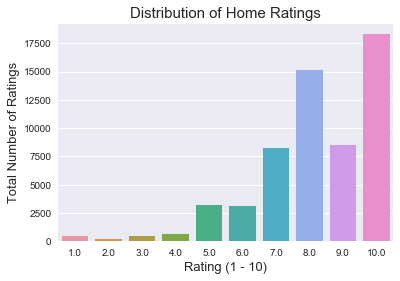

In [23]:
# plot a histogram to show the distribution of ratings

sns.countplot(x='rating_house', data=df_household_clean)
plt.title('Distribution of Home Ratings', fontsize=15)
plt.xlabel('Rating (1 - 10)', fontsize=13)
plt.ylabel('Total Number of Ratings', fontsize=13)

plt.show()

The most common rating that respondents gave their homes was 10, followed by 8. Very few people gave their homes a rating lower than 5.

## How do house ratings vary amongst different metropolitan areas?

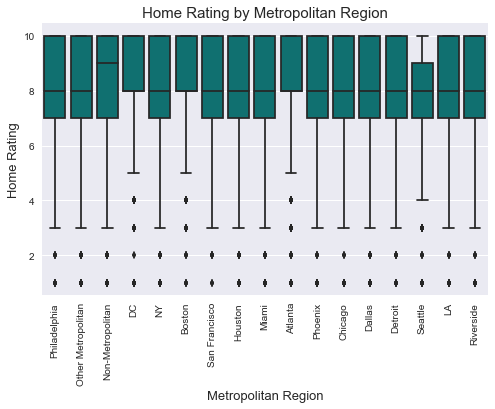

In [32]:
plt.figure(figshttp://localhost:8912/notebooks/Desktop/Springboard/Capstone_1/EDA_American%20Housing%20Survey%202015.ipynb#How-do-house-ratings-vary-amongst-different-metropolitan-areas?ize=(8,5))
sns.boxplot(y='rating_house', x='metro_area', data=df_household_clean, color='teal')
plt.xticks(rotation=90)
plt.xlabel('Metropolitan Region', fontsize=13)
plt.ylabel('Home Rating', fontsize=13)
plt.title('Home Rating by Metropolitan Region', fontsize=15)
plt.show()

The median rating for almost every region is 8, but the range of ratings varies slightly by region. The range of ratings for DC, Boston, and Atlanta were smallest, with 95% of ratings falling between 5 and 10. Seattle's distribution of ratings is also slightly different. It may be worth examining the differences between ratings in metropolitan regions more closely.

## How do house ratings vary between renters and homeowners?

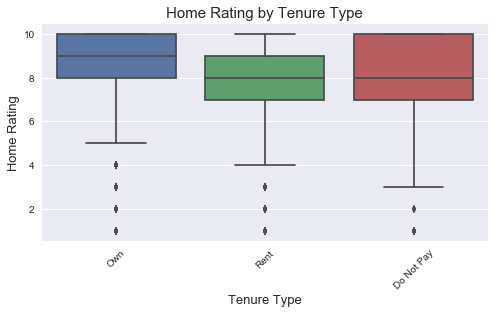

In [36]:
plt.figure(figsize=(8,4))
sns.boxplot(x='tenure', y='rating_house', data=df_household_clean).set(xticklabels=['Own','Rent','Do Not Pay'])
plt.xticks(rotation=45)
plt.xlabel('Tenure Type', fontsize=13)
plt.ylabel('Home Rating', fontsize=13)
plt.title('Home Rating by Tenure Type', fontsize=15)
plt.show()

Homeowners tend to rate their homes more highly than renters and people who do not pay for their own housing.

## Do renters and homeowners rate their homes differently in different metropolitan regions?

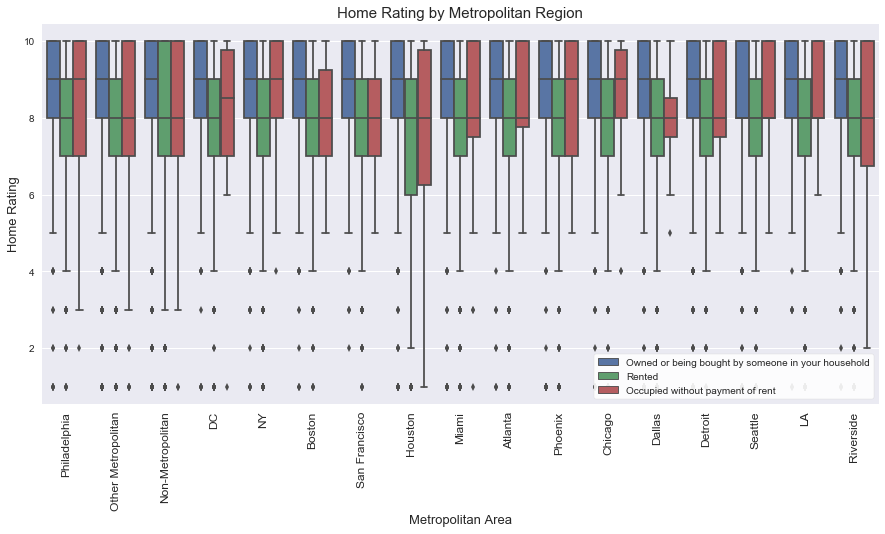

In [37]:
plt.figure(figsize=(15,7))

sns.boxplot(x='metro_area', y='rating_house', data=df_household_clean, hue='tenure')

plt.xticks(rotation=90, fontsize=12)
plt.legend(loc='lower right', frameon=True, facecolor='white', framealpha=0.9)
plt.xlabel('Metropolitan Area', fontsize=13)
plt.ylabel('Home Rating', fontsize=13)
plt.title('Home Rating by Metropolitan Region', fontsize=15)
plt.show()

## Does the number of rooms in a home correlate to how highly the home is rated?

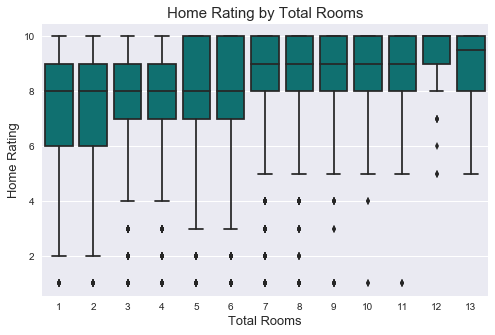

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(x='total_rooms', y='rating_house', data=df_household_clean, color='teal')
plt.xlabel('Total Rooms', fontsize=13)
plt.ylabel('Home Rating', fontsize=13)
plt.title('Home Rating by Total Rooms', fontsize=15)
plt.show()

In general, the more rooms there were in a home, the higher the rating.

## Does the number of rooms per person affect how highly a home is rated?

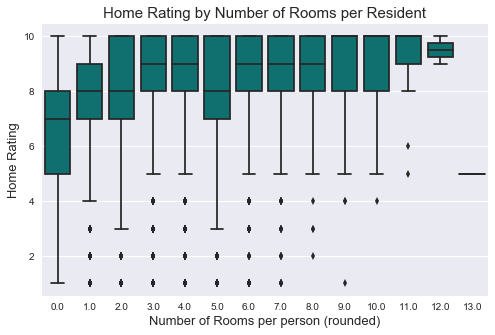

In [39]:
plt.figure(figsize=(8,5))
rooms_per_person = (df_household_clean['total_rooms']/df_household_clean['num_people']).round(decimals=0)
sns.boxplot(x=rooms_per_person, y='rating_house', data=df_household_clean, color='teal')
plt.xlabel('Number of Rooms per person (rounded)', fontsize=13)
plt.ylabel('Home Rating', fontsize=13)
plt.title('Home Rating by Number of Rooms per Resident', fontsize=15)
plt.show()

## Does the age of a home correlate to how highly the home is rated?

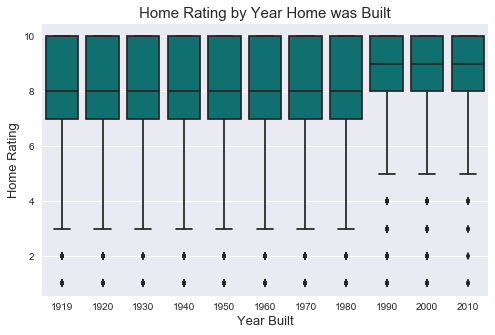

In [42]:
plt.figure(figsize=(8,5))
sns.boxplot(x='year_built', y='rating_house', data=df_household_clean, color='teal')
plt.xlabel('Year Built', fontsize=13)
plt.ylabel('Home Rating', fontsize=13)
plt.title('Home Rating by Year Home was Built', fontsize=15)
plt.show()

The ratings for homes built after 1990 tend to be higher, but before that, there don't seem to be any major differences in ratings for homes built between 1919 and the 1980s.

## What is the distribution of ratings for neighborhoods in the 2015 American Housing Survey? 


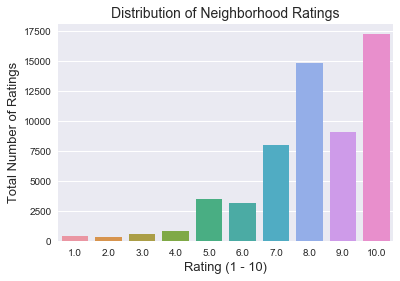

In [20]:
# plot a histogram to show the distribution of ratings

sns.countplot(x='rating_neighborhood', data=df_household_clean)
plt.title('Distribution of Neighborhood Ratings', fontsize=14)
plt.xlabel('Rating (1 - 10)', fontsize=13)
plt.ylabel('Total Number of Ratings', fontsize=13)

plt.show()

The distribution of ratings for neighborhoods in the 2015 American Housing survey is very similar to the distribution of ratings for homes—10 is the most common rating, followed by 8.

## Do neighborhood ratings vary amongst different metropolitan regions?

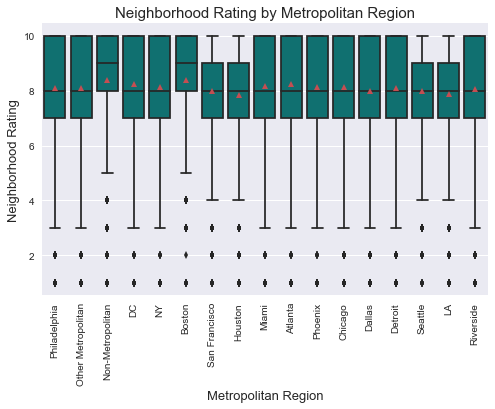

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(x='metro_area', y='rating_neighborhood', data=df_household_clean, color='teal', showmeans=True)
plt.xticks(rotation=90)
plt.xlabel('Metropolitan Region', fontsize=13)
plt.ylabel('Neighborhood Rating', fontsize=13)
plt.title('Neighborhood Rating by Metropolitan Region', fontsize=15)
plt.show()

Neighborhood ratings are generally similar amongst the different metropolitan regions, but Boston and Non-Metropolitan neighborhoods had the highest median and average ratings.

## Does the perception of petty crime affect how people rate their neighborhoods?

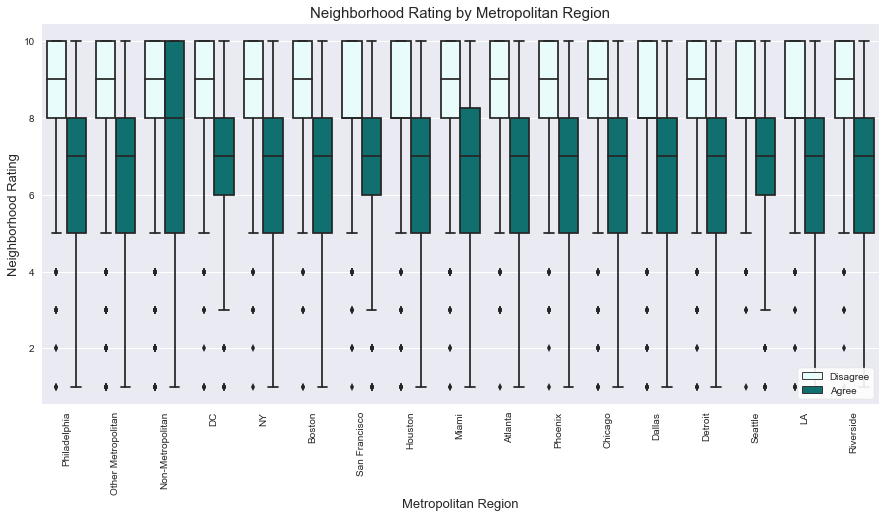

In [44]:
plt.figure(figsize=(15,7))

sns.boxplot(x='metro_area', y='rating_neighborhood', data=df_household_clean, color='teal', hue='petty_crime')
plt.xticks(rotation=90)
plt.legend(loc='lower right', frameon=True, facecolor='white', framealpha=0.9)
plt.xlabel('Metropolitan Region', fontsize=13)
plt.ylabel('Neighborhood Rating', fontsize=13)
plt.title('Neighborhood Rating by Metropolitan Region', fontsize=15)
plt.show()

## Conclusions

Survey respondents tended to rate their homes and neighborhoods highly, with the most common score being 10 and the second most common score being 8. Homeowners tended to rate their homes more highly than renters, regardless of which metropolitan region they lived in.
